In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

C:\Users\91882\AppData\Local\Temp\ipykernel_33128\2205501623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv("FastagFraudDetection.csv")

In [3]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


<Axes: xlabel='Fraud_indicator', ylabel='count'>

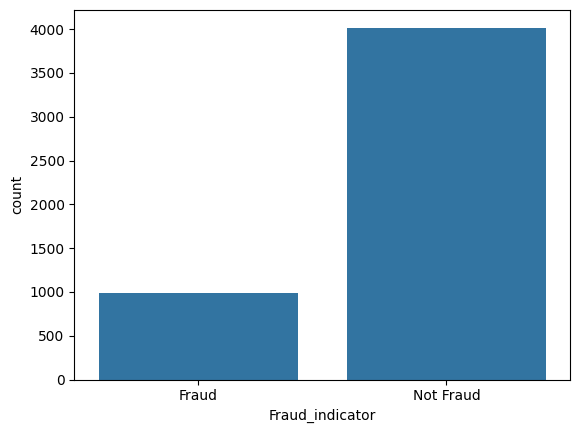

In [4]:
sns.countplot(df,x="Fraud_indicator")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [6]:
df["Vehicle_Type"].unique()

array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object)

In [7]:
x = df.drop(['Transaction_ID',"FastagID","TollBoothID","Geographical_Location","Vehicle_Plate_Number","Fraud_indicator","Timestamp","Vehicle_Type",	"Lane_Type", "Vehicle_Dimensions"],axis=1)

In [8]:
vehicle_dummy = pd.get_dummies(df['Vehicle_Type'])
vehicle_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Bus         5000 non-null   bool 
 1   Car         5000 non-null   bool 
 2   Motorcycle  5000 non-null   bool 
 3   SUV         5000 non-null   bool 
 4   Sedan       5000 non-null   bool 
 5   Truck       5000 non-null   bool 
 6   Van         5000 non-null   bool 
dtypes: bool(7)
memory usage: 34.3 KB


In [9]:
lane_dummy = pd.get_dummies(df['Lane_Type'])
lane_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Express  5000 non-null   bool 
 1   Regular  5000 non-null   bool 
dtypes: bool(2)
memory usage: 9.9 KB


In [10]:
dimension_dummy = pd.get_dummies(df['Vehicle_Dimensions'])
dimension_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Large   5000 non-null   bool 
 1   Medium  5000 non-null   bool 
 2   Small   5000 non-null   bool 
dtypes: bool(3)
memory usage: 14.8 KB


In [11]:
concat = pd.concat([vehicle_dummy,lane_dummy,dimension_dummy],axis=1)
concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Bus         5000 non-null   bool 
 1   Car         5000 non-null   bool 
 2   Motorcycle  5000 non-null   bool 
 3   SUV         5000 non-null   bool 
 4   Sedan       5000 non-null   bool 
 5   Truck       5000 non-null   bool 
 6   Van         5000 non-null   bool 
 7   Express     5000 non-null   bool 
 8   Regular     5000 non-null   bool 
 9   Large       5000 non-null   bool 
 10  Medium      5000 non-null   bool 
 11  Small       5000 non-null   bool 
dtypes: bool(12)
memory usage: 58.7 KB


In [12]:
x = pd.concat([x,concat],axis=1)

In [13]:
# To handle null value but in this there is no null value
# x.isnull().sum()
# x.fillna(x['Amount_paid'].mean())

In [14]:
y = df['Fraud_indicator']
y.head()

0        Fraud
1        Fraud
2    Not Fraud
3        Fraud
4        Fraud
Name: Fraud_indicator, dtype: object

In [15]:
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=42,shuffle=True,test_size=.2)

In [16]:
clf = RandomForestClassifier()
clf

RandomForestClassifier()

In [17]:
clf.fit(x_train.values,y_train.values)

RandomForestClassifier()

In [18]:
pred_res = clf.predict(x_test.values)
pred_res

array(['Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Fraud', 'Not Fraud', 'N

In [19]:
actual_res = y_test.values

In [20]:
ans = 0
for i in range(len(pred_res)):
  if actual_res[i] == pred_res[i] :
    ans+=1
ans

996

In [21]:
cf = confusion_matrix(actual_res,pred_res)
cf

array([[213,   4],
       [  0, 783]], dtype=int64)

<Axes: >

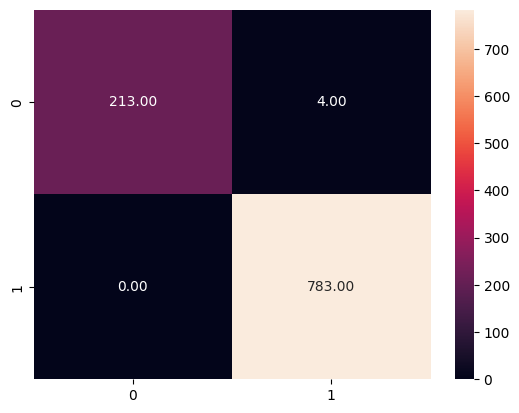

In [22]:
sns.heatmap(cf, annot=True, fmt=".2f")

In [23]:
accuracy = accuracy_score(actual_res, pred_res)

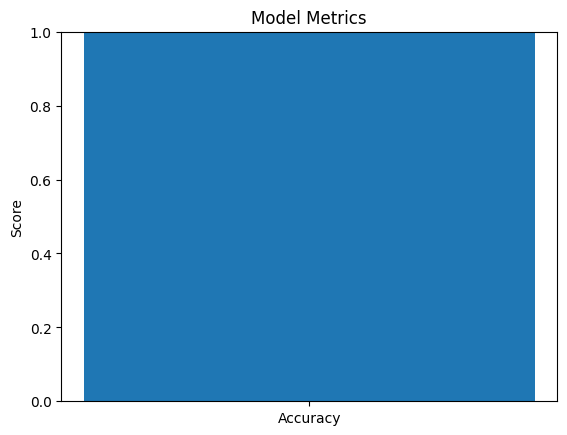

0.996

In [24]:
metrics = ['Accuracy']
values = [accuracy]

plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1)  
plt.show()
accuracy